In [2]:
import numpy as np
import matplotlib.pyplot as plt
from layers import *
from gradientCheck import *
from relativeError import *
from fcnet import *
from Trainer import *
from data_loader import *
%reload_ext autoreload
%autoreload 2

%matplotlib inline

## 引入CIFAR10 data

In [3]:
cifar10_dir = 'datasets/cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000,)
(10000, 32, 32, 3)
(10000,)


4


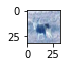

In [5]:
fig = plt.figure(figsize=(0.6, 0.6))
plt.imshow(X_train[3])
print(y_train[3])

## 将测试集分出1000个，作为validation set

In [6]:
num_validation = 1000
num_train = X_train.shape[0] - num_validation

X_val = X_train[num_train:]
y_val = y_train[num_train:]

X_train = X_train[:num_train]
y_train = y_train[:num_train]

print(X_train.shape)
print(y_train.shape)

print(X_val.shape)
print(y_val.shape)

(49000, 32, 32, 3)
(49000,)
(1000, 32, 32, 3)
(1000,)


## 进行数据处理，减去均值

In [16]:
mean_image = np.mean(X_train, axis=0)
print(mean_image.shape)
X_train -= mean_image
X_val -= mean_image
X_test -= mean_image

(32, 32, 3)


In [23]:
data = {'X_train': X_train, 'y_train': y_train, 'X_val': X_val, 'y_val': y_val}
net = FullyConnectNet(layers=[100, 10], input_dim=32*32*3, reg=1e-1, weight_scale=1e-4)
trainer = Trainer(net, data, batch_size=100, epoch_nums=10, learning_rate=1e-3)

0.0001


In [ ]:
trainer.train()

epoch1: train acc: 0.43 val acc 0.44
epoch2: train acc: 0.48 val acc 0.46
epoch3: train acc: 0.50 val acc 0.49
